### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing  & Exploring Data

In [2]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
missing = df.isnull().sum() 
missing = missing[missing > 0]
missing

Age       86
Fare       1
Cabin    327
dtype: int64

In [5]:
df['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

''

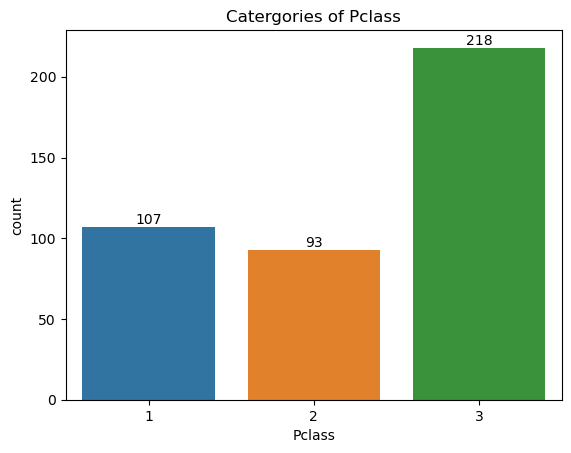

In [6]:
ax = sns.countplot(data = df, x='Pclass')
plt.bar_label(ax.containers[0])
plt.title('Catergories of Pclass')
#plt.savefig('figure.png')
;

''

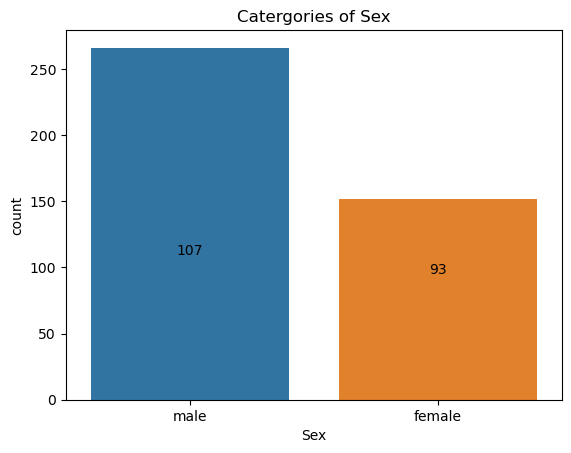

In [7]:
sns.countplot(data = df, x='Sex')
plt.bar_label(ax.containers[0])
plt.title('Catergories of Sex')
;

In [8]:
survived_by_sex= df.groupby("Survived")['Sex'].count()
survived_by_sex

Survived
0    266
1    152
Name: Sex, dtype: int64

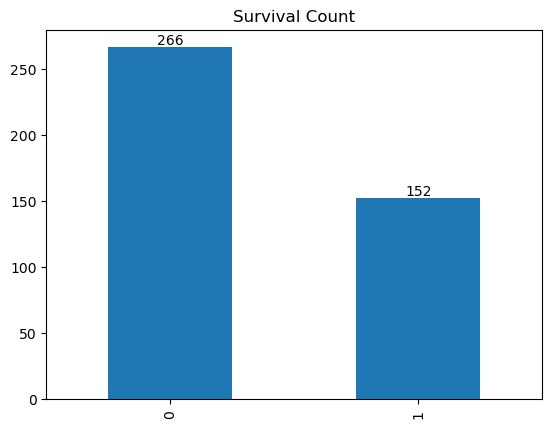

In [9]:
ax = df["Survived"].value_counts()\
.plot(kind="bar", title = "Survival Count")
ax.bar_label(ax.containers[0]);


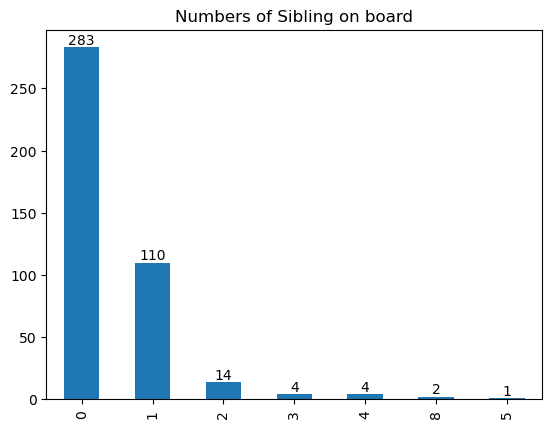

In [10]:
ax = df["SibSp"].value_counts()\
.plot(kind="bar", title = "Numbers of Sibling on board")
ax.bar_label(ax.containers[0]);


''

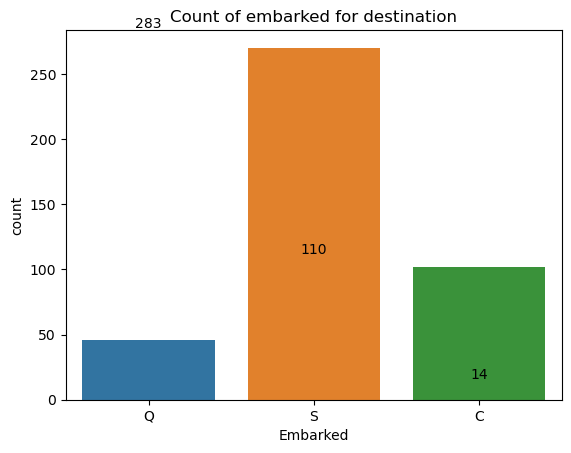

In [11]:
sns.countplot(data = df, x='Embarked')
plt.bar_label(ax.containers[0])
plt.title('Count of embarked for destination')
;

In [12]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

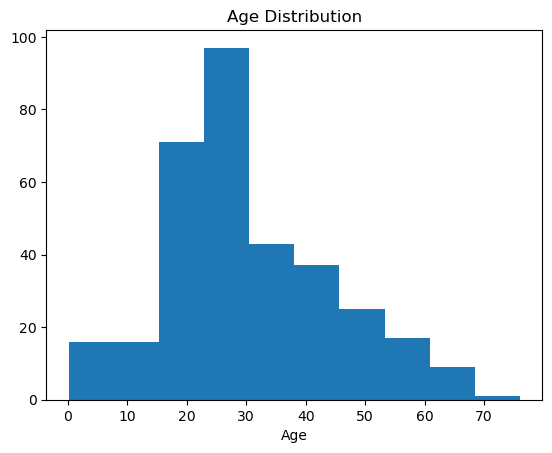

In [13]:
plt.hist(x=df['Age'])
plt.xlabel('Age')
plt.title('Age Distribution');

In [14]:
df['Age'].fillna(value=df['Age'].mean(),inplace= True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [16]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [17]:
new_df = df.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis= 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [18]:
new_df = new_df.dropna()

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    object 
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [21]:
le = LabelEncoder()
new_df['Embarked']= le.fit_transform(new_df['Embarked'])

In [22]:
le = LabelEncoder()
new_df['Sex']= le.fit_transform(new_df['Sex'])

In [23]:
new_df.dtypes
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [24]:
y = new_df['Survived']
X = new_df.drop(columns='Survived')

In [25]:
#import train test split
from sklearn.model_selection import train_test_split


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify= y ,random_state=42)

### Importing Models

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix

In [28]:
models = [LogisticRegression(max_iter=1000),RandomForestClassifier(),GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]

In [29]:
def get_score():
    for model in models:
        score = ((cross_val_score(model,X,y,cv=5)) * 100).round(2)
        mean_accuracy = sum(score) / len(score)
        print(f" Cross Validation for the {model}: {score}")
        print(f'Accuracy % of the {model}- {mean_accuracy}')
        print('------------------------------------------------------------------------------------')
        

In [30]:
get_score()

 Cross Validation for the LogisticRegression(max_iter=1000): [100. 100. 100. 100. 100.]
Accuracy % of the LogisticRegression(max_iter=1000)- 100.0
------------------------------------------------------------------------------------
 Cross Validation for the RandomForestClassifier(): [100. 100. 100. 100. 100.]
Accuracy % of the RandomForestClassifier()- 100.0
------------------------------------------------------------------------------------
 Cross Validation for the GradientBoostingClassifier(): [100. 100. 100. 100. 100.]
Accuracy % of the GradientBoostingClassifier()- 100.0
------------------------------------------------------------------------------------
 Cross Validation for the SVC(): [65.48 63.1  60.24 60.24 63.86]
Accuracy % of the SVC()- 62.584
------------------------------------------------------------------------------------
 Cross Validation for the KNeighborsClassifier(): [59.52 69.05 65.06 69.88 67.47]
Accuracy % of the KNeighborsClassifier()- 66.196
-------------------

In [31]:
model_knc = KNeighborsClassifier()

In [32]:
model_knc.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
prediction = model_knc.predict(X_test)
prediction

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [34]:
new_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2


In [ ]:
dicty = {}
keys = ['Pclass',"Sex","Age",'SibSp','Parch','Fare','Embarked']
for key in keys:
    values = input(f'Enter an value  for {key} ')
    dicty[key] = values
    
name = input('Enter a name: ')    
dff = pd.DataFrame([dicty])
result = model_knc.predict(dff)
if result == 0:
    result = 'not_survived'
else:
    result = 'survived'

print(f'If {name} was in the titanic, {name} would {result}')